# **FordGoBike 2019** - Data Analysis and Visualization

## By Jeet

## Introduction
ForGoBike is a Bike rental service from Lyft where any person can rent a bike at ease at a minimal cost of  \$2 as well as in subscribe it using Monthly & Yearly Subscriptiom 
## About DataSet
The Dataset contains details like for the months of May, June, July, August, September, October i.e. (5 - 10)
* Trip Duration (seconds)
* Start Time and Date
* End Time and Date
* Start Station ID
* Start Station Name
* Start Station Latitude
* Start Station Longitude
* End Station ID
* End Station Name
* End Station Latitude
* End Station Longitude
* Bike ID
* User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

In [5]:
#Importing required libraries 
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import calendar

%matplotlib inline

import glob
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [6]:
from pathlib import Path
dir = Path(r'C:\Users\mavje\Desktop\Communicate Data Findings\fordgobike2019')

## Preliminary Wrangling

In [7]:
#Reading all the .csv files and concatenating them into one dataframe "df"
df = (pd.read_csv(f) for f in dir.glob("*.csv"));
df = pd.concat(df);

D:\Applications\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Applications\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
#Shape of the database
df.shape

(1300481, 15)

In [9]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,48877,2019-05-31 20:34:56.8110,2019-06-01 10:09:34.7960,321.0,5th St at Folsom,37.780146,-122.403071,60.0,8th St at Ringold St,37.774520,-122.409449,1416,Customer,No,NaN
1,47050,2019-05-31 19:43:56.1960,2019-06-01 08:48:06.9190,246.0,Berkeley Civic Center,37.869060,-122.270556,266.0,Parker St at Fulton St,37.862464,-122.264791,1797,Subscriber,No,NaN
2,5912,2019-05-31 23:54:24.0890,2019-06-01 01:32:56.9820,149.0,Emeryville Town Hall,37.831275,-122.285633,149.0,Emeryville Town Hall,37.831275,-122.285633,3612,Customer,No,NaN
3,2629,2019-05-31 23:59:57.4490,2019-06-01 00:43:46.8740,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,2333,Customer,No,NaN
4,4235,2019-05-31 23:05:48.9320,2019-06-01 00:16:24.4570,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,368.0,Myrtle St at Polk St,37.785434,-122.419622,181,Subscriber,No,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300481 entries, 0 to 239894
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             1300481 non-null  int64  
 1   start_time               1300481 non-null  object 
 2   end_time                 1300481 non-null  object 
 3   start_station_id         1242419 non-null  float64
 4   start_station_name       1243015 non-null  object 
 5   start_station_latitude   1300481 non-null  float64
 6   start_station_longitude  1300481 non-null  float64
 7   end_station_id           1240628 non-null  float64
 8   end_station_name         1241178 non-null  object 
 9   end_station_latitude     1300481 non-null  float64
 10  end_station_longitude    1300481 non-null  float64
 11  bike_id                  1300481 non-null  int64  
 12  user_type                1300481 non-null  object 
 13  bike_share_for_all_trip  1208734 non-null  

In [11]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,1.300481e+06,1.242419e+06,1.300481e+06,1.300481e+06,1.240628e+06,1.300481e+06,1.300481e+06,1.300481e+06
mean,8.310963e+02,1.471517e+02,3.776494e+01,-1.223504e+02,1.429017e+02,3.776481e+01,-1.223486e+02,3.778136e+04
std,1.895041e+03,1.233479e+02,1.089662e-01,1.517770e-01,1.223162e+02,1.546391e-01,3.866240e-01,1.358029e+05
min,6.000000e+01,3.000000e+00,3.727952e+01,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02,1.200000e+01
25%,3.740000e+02,4.700000e+01,3.776931e+01,-1.224125e+02,4.200000e+01,3.777003e+01,-1.224113e+02,1.473000e+03
50%,5.920000e+02,1.040000e+02,3.778053e+01,-1.223983e+02,1.000000e+02,3.778076e+01,-1.223974e+02,2.978000e+03
75%,9.180000e+02,2.430000e+02,3.779539e+01,-1.222914e+02,2.390000e+02,3.779625e+01,-1.222935e+02,1.005800e+04
max,8.621700e+04,4.820000e+02,4.551000e+01,-7.357000e+01,4.820000e+02,4.551000e+01,0.000000e+00,9.994220e+05


In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id             58062
start_station_name           57466
start_station_latitude           0
start_station_longitude          0
end_station_id               59853
end_station_name             59303
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip      91747
rental_access_method       1208734
dtype: int64

## Cleaning

1. Columns not required for analysis - start_station_latitude, start_station_longitude , end_station_latitude, end_station_longitude and should be dropped
2. Also dropping rental_access_method since alot of data is null because that column is available for only 2 months out of 6.
3. Changing start_time and end_time datatypes to standard datetime.
4. Changing start_station_id, end_station_id and bike_id to object
5. Dropping null values
6. Creating dummy values for user_type and bike_share_for_all_trip.

Creating a copy of the dataset

In [14]:
df2 = df.copy()

In [15]:
df2.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,48877,2019-05-31 20:34:56.8110,2019-06-01 10:09:34.7960,321.0,5th St at Folsom,37.780146,-122.403071,60.0,8th St at Ringold St,37.774520,-122.409449,1416,Customer,No,NaN
1,47050,2019-05-31 19:43:56.1960,2019-06-01 08:48:06.9190,246.0,Berkeley Civic Center,37.869060,-122.270556,266.0,Parker St at Fulton St,37.862464,-122.264791,1797,Subscriber,No,NaN
2,5912,2019-05-31 23:54:24.0890,2019-06-01 01:32:56.9820,149.0,Emeryville Town Hall,37.831275,-122.285633,149.0,Emeryville Town Hall,37.831275,-122.285633,3612,Customer,No,NaN
3,2629,2019-05-31 23:59:57.4490,2019-06-01 00:43:46.8740,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,2333,Customer,No,NaN
4,4235,2019-05-31 23:05:48.9320,2019-06-01 00:16:24.4570,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,368.0,Myrtle St at Polk St,37.785434,-122.419622,181,Subscriber,No,NaN


#### Code

Columns not required for analysis - start_station_latitude, start_station_longitude , end_station_latitude, end_station_longitude, rental_access_method and should be dropped.

In [16]:
#List of columns to be dropped
col = ['start_station_latitude', 'start_station_longitude' , 'end_station_latitude', 'end_station_longitude','rental_access_method']
df2.drop(col,axis = 1, inplace = True)

#### Test

In [17]:
df2.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'bike_id',
       'user_type', 'bike_share_for_all_trip'],
      dtype='object')

Changing start_time and end_time datatypes to standard datetime & bike_id 

#### Code

In [18]:
df2.start_time = pd.to_datetime(df2.start_time)
df2.end_time = pd.to_datetime(df2.end_time)

#### Test

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300481 entries, 0 to 239894
Data columns (total 10 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1300481 non-null  int64         
 1   start_time               1300481 non-null  datetime64[ns]
 2   end_time                 1300481 non-null  datetime64[ns]
 3   start_station_id         1242419 non-null  float64       
 4   start_station_name       1243015 non-null  object        
 5   end_station_id           1240628 non-null  float64       
 6   end_station_name         1241178 non-null  object        
 7   bike_id                  1300481 non-null  int64         
 8   user_type                1300481 non-null  object        
 9   bike_share_for_all_trip  1208734 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 109.1+ MB


Dropping Rows with Null Values

In [20]:
df2.dropna(subset = ['start_station_name','start_station_id','end_station_id','bike_share_for_all_trip'],inplace = True)

### Test

In [21]:
df2.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
end_station_id             0
end_station_name           0
bike_id                    0
user_type                  0
bike_share_for_all_trip    0
dtype: int64

In [22]:
df2.shape

(1208719, 10)

Changing datatype of start_station_id, end_station_id and bike_id to object

#### Code

In [23]:
#change user type and bike_share_for_all_trip to category
df2.user_type = df2.user_type.astype('category')
df2.bike_share_for_all_trip = df2.bike_share_for_all_trip.astype('category')

#### Test

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208719 entries, 0 to 239894
Data columns (total 10 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1208719 non-null  int64         
 1   start_time               1208719 non-null  datetime64[ns]
 2   end_time                 1208719 non-null  datetime64[ns]
 3   start_station_id         1208719 non-null  float64       
 4   start_station_name       1208719 non-null  object        
 5   end_station_id           1208719 non-null  float64       
 6   end_station_name         1208719 non-null  object        
 7   bike_id                  1208719 non-null  int64         
 8   user_type                1208719 non-null  category      
 9   bike_share_for_all_trip  1208719 non-null  category      
dtypes: category(2), datetime64[ns](2), float64(2), int64(2), object(2)
memory usage: 85.3+ MB


For the Analysis Part, Ill be creating month, week column to deepen the analysis and provide with accurate visualizations

In [25]:
#Extracting Month Number from start_time
df2['month'] = df2['start_time'].apply(lambda time: time.month)

#### Test

In [26]:
df2['month'].value_counts()

10    239895
9     217986
8     210563
6     187879
5     182148
7     170248
Name: month, dtype: int64

#### Code

In [27]:
#Extracting Day Number from start_time
df2['weekday'] = df2['start_time'].apply(lambda time: time.dayofweek)

#### Test

In [28]:
df2['weekday'].value_counts()

2    211714
3    208039
1    206285
4    187752
0    187654
5    107690
6     99585
Name: weekday, dtype: int64

#### Code

In [29]:
# Start and end time hour
df2['st_time_hr'] = df2['start_time'].dt.hour
df2['e_time_hr'] = df2['end_time'].dt.hour

#### Test

In [30]:
df2['st_time_hr'].value_counts()

17    147129
8     136987
18    118293
9     105902
16     91043
19     72183
7      71300
15     56531
10     51795
12     51218
13     50271
14     48485
11     47420
20     45471
21     31335
6      27453
22     20876
23     12603
0       6810
5       6429
1       3943
2       2545
4       1523
3       1174
Name: st_time_hr, dtype: int64

In [31]:
df2['e_time_hr'].value_counts()

17    140996
8     128358
18    127797
9     117658
16     83843
19     79860
7      59972
10     55848
15     53113
12     50628
13     50421
20     50032
14     47975
11     45684
21     33902
22     22931
6      22875
23     13967
0       7683
5       5312
1       4211
2       2929
4       1486
3       1238
Name: e_time_hr, dtype: int64

In [32]:
df2.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'bike_id',
       'user_type', 'bike_share_for_all_trip', 'month', 'weekday',
       'st_time_hr', 'e_time_hr'],
      dtype='object')

Since I have made a Separate Column for Start Time and End Time by hour, I wont be needing the start_time & end_time. Hence after dropping this two columns, I'll copy the dataset to a new dataframe and save it to **".csv"** file

#### Code

In [33]:
#Dropping start_time & end_time
df2.drop(['start_time','end_time'],axis = 1, inplace = True)

#### Test

In [34]:
df2.columns

Index(['duration_sec', 'start_station_id', 'start_station_name',
       'end_station_id', 'end_station_name', 'bike_id', 'user_type',
       'bike_share_for_all_trip', 'month', 'weekday', 'st_time_hr',
       'e_time_hr'],
      dtype='object')

Copying df2 to a master dataframe

In [35]:
#Copying df2 to master
master = df2.copy()

Saving master dataframe to 'master_fordgobike2019.csv' file

In [36]:
#Exporting cleaned dataset using .to_csv
master.to_csv('master_fordgobike2019.csv', index = False)

In [37]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208719 entries, 0 to 239894
Data columns (total 12 columns):
 #   Column                   Non-Null Count    Dtype   
---  ------                   --------------    -----   
 0   duration_sec             1208719 non-null  int64   
 1   start_station_id         1208719 non-null  float64 
 2   start_station_name       1208719 non-null  object  
 3   end_station_id           1208719 non-null  float64 
 4   end_station_name         1208719 non-null  object  
 5   bike_id                  1208719 non-null  int64   
 6   user_type                1208719 non-null  category
 7   bike_share_for_all_trip  1208719 non-null  category
 8   month                    1208719 non-null  int64   
 9   weekday                  1208719 non-null  int64   
 10  st_time_hr               1208719 non-null  int64   
 11  e_time_hr                1208719 non-null  int64   
dtypes: category(2), float64(2), int64(6), object(2)
memory usage: 103.7+ MB


In [38]:
master.shape

(1208719, 12)

### What is the structure of your dataset?

1. There are 1208719 entries for FordGoBike with 12 features like 'duration_sec', 'start_station_id', 'start_station_name', 'end_station_id', 'end_station_name', 'bike_id', 'user_type', 'bike_share_for_all_trip', 'month', 'weekday', 'st_time_hr', 'e_time_hr'.
2. duration_sec, month, weekday, st_time_hr, e_time_hr which is hour at which the ride was started and ended resp in *int* datatype. 
3. user_type & bike_share_for_all_trip are of *category* type and the rest of *object* type


### What is/are the main feature(s) of interest in your dataset?

The main features of dataset include the duration of the trip along with the start_location and end_location through which we can find out which location receives more users ? Using the dataset we can also find out which month, weekday, hour has more users. Since there are two types of users, I would also like to see how much more % of subscribers ride than customers. The dataset also features bike sharing data through which we can find out % of users sharing than others.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the starting station and ending station will have major effect on analysis. Also more users on weekdays during morning and evening hours are expected.

## Univariate Exploration

I'll start by looking at the distribution

In [39]:
#Setting base color
base_color = color = '#006400'

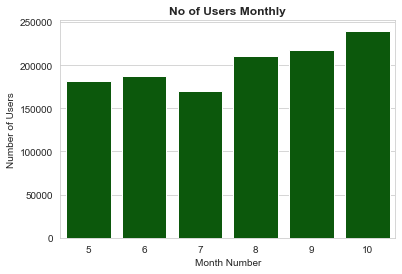

In [40]:
#Setting style
sb.set_style('whitegrid');
#Plotting
ax = sb.countplot(data = master, x = 'month',color = base_color);
#Title, xlabel and ylabel
plt.title('No of Users Monthly', weight = 'bold');
ax.set(xlabel="Month Number", ylabel = "Number of Users");

In [41]:
#Mapping day number to dayname
dday = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
master['dayname'] = master['weekday'].map(dday)
master['dayname'].value_counts()

Wednesday    211714
Thursday     208039
Tuesday      206285
Friday       187752
Monday       187654
Saturday     107690
Sunday        99585
Name: dayname, dtype: int64

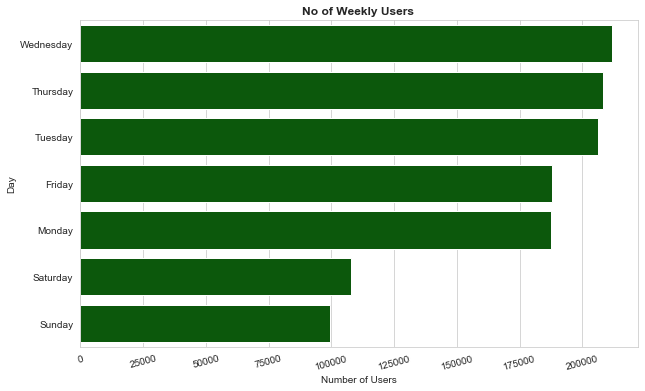

In [42]:
#Setting style
sb.set_style('whitegrid');
plt.figure(figsize = (10,6))
#Plotting horizontally
ax = sb.countplot(data = master, y = master['dayname'],color = base_color, order = master['dayname'].value_counts().index);
#Title, xlabel and ylabel
plt.title('No of Weekly Users ', weight = 'bold');
labels = ['0','25000','50000','75000', '100000','125000', '150000','175000', '200000']
ax.set_xticklabels(labels, rotation=15)
ax.set(xlabel='Number of Users', ylabel = "Day");

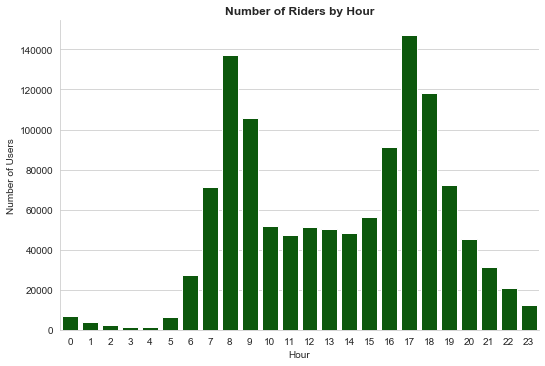

In [43]:
#Setting style
sb.set_style('whitegrid');
#plotting
graph = sb.catplot(data = master, x='st_time_hr', kind='count', color = base_color , height = 5, aspect = 1.5)
#Title, xlabel and ylabel
graph.set_axis_labels('Hour', 'Number of Users')
plt.title('Number of Riders by Hour', fontweight='bold');

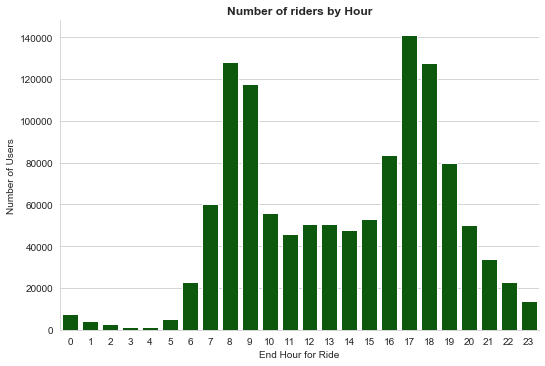

In [44]:
#Setting style
sb.set_style('whitegrid');
#plotting
graph = sb.catplot(data = master, x='e_time_hr', kind='count', color = base_color , height = 5, aspect = 1.5)
#Title, xlabel and ylabel
graph.set_axis_labels('End Hour for Ride', 'Number of Users')
plt.title('Number of riders by Hour', fontweight='bold');

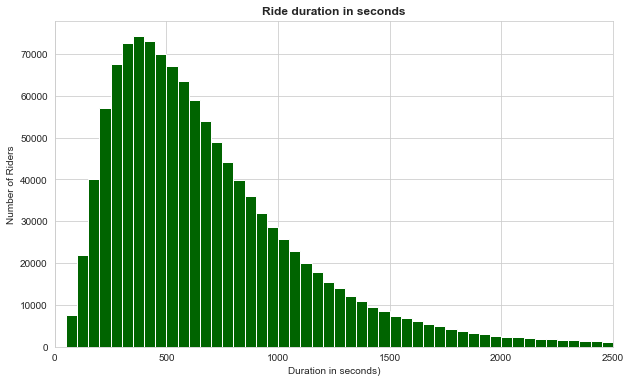

In [45]:
#Setting style
sb.set_style('whitegrid');
#setting bins
bin_edges = np.arange(0, 3000, 50)
plt.figure(figsize = (10,6))
#plotting
plt.hist(data = master, x = 'duration_sec', bins = bin_edges, color = base_color);
#title, xlabel and ylabel
plt.title("Ride duration in seconds", fontweight='bold')
plt.xlabel('Duration in seconds)')
plt.ylabel('Number of Riders');
#limiting chart to 2500 seconds
plt.xlim(0,2500);

A Right-skewed graph for duration_sec

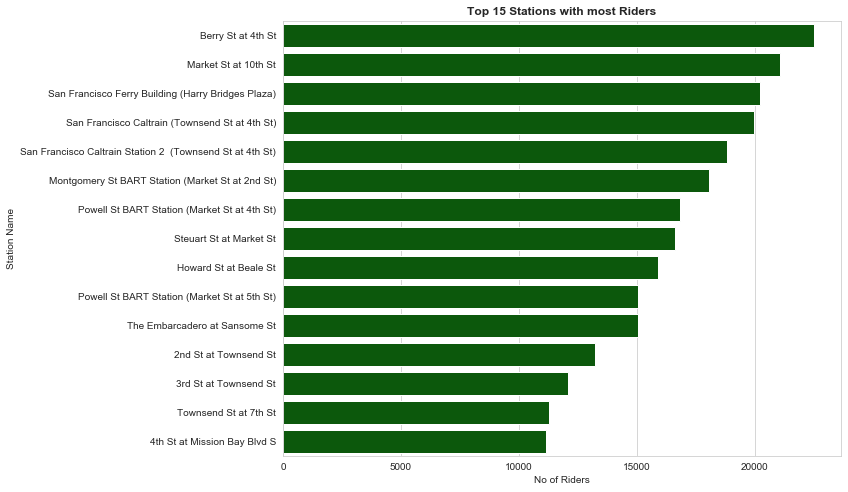

In [46]:
#Setting style
sb.set_style('whitegrid');
plt.figure(figsize = (10,8))
#plotting
sb.countplot(data = master, y = master.start_station_name,color = base_color, order = master.start_station_name.value_counts()[:15].index);
#title, xlabel and ylabel
plt.xlabel('No of Riders');
plt.ylabel('Station Name');
plt.title('Top 15 Stations with most Riders', fontweight = 'bold');

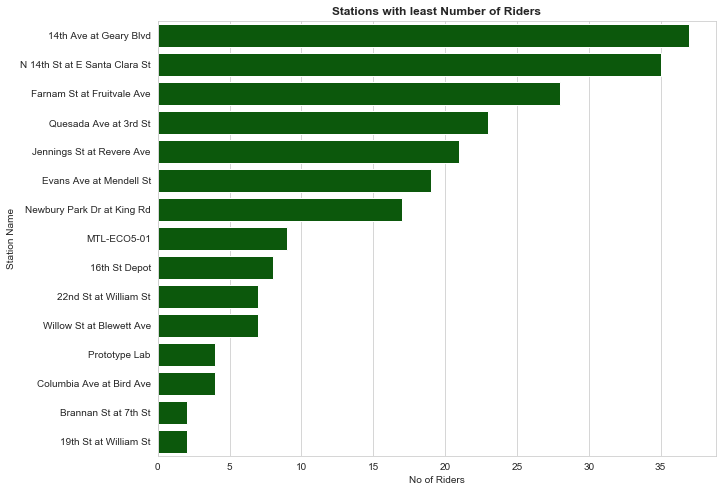

In [47]:
#Setting style
sb.set_style('whitegrid');
plt.figure(figsize = (10,8))
#plotting
sb.countplot(data = master, y = master.start_station_name,color = base_color, order = master.start_station_name.value_counts()[-15:].index);
#title, xlabel and ylabel
plt.xlabel('No of Riders');
plt.ylabel('Station Name');
plt.title('Stations with least Number of Riders', fontweight = 'bold');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
1. Variables like Stations with most as well as least number of riders. All the variables are important for the dataset and to communicate data findings. Originally, there are 182162 entries in the dataset out of which 1208719  are in the dataframe.
2. As expected, the number of bike rides is higher during weekdays than on weekends with Wednesday, Thursday, Tuesday being the highest(in order).
3. Majority of the bike rides happen between 7th to 10th hour and between 15th to 20th hour.
4. Number of rides in the Month of October(10), September(9) are more than others with July(7) having the least number of rides.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Columns which were not required as well as columns like rental_access_method which had many null values would have hindered the accuracy of the analysis as well as since our dataset contained already alot of entries dropping the null values would not cause any problems.

## Bivariate Exploration
Relationships between variables will be explored in this section

In [48]:
#Calculating Proportion of bike users
bike_share = len(master.query('bike_share_for_all_trip == "Yes"')) /  len(master.bike_share_for_all_trip)
no_bike_share = len(master.query('bike_share_for_all_trip == "No"')) /  len(master.bike_share_for_all_trip)

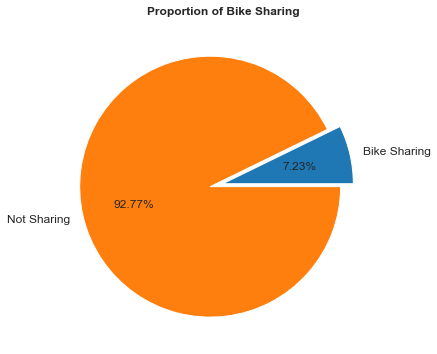

In [49]:
#Setting style
sb.set_style('whitegrid');
plt.figure(figsize = (6,6))
#Reading proportions
prop = [bike_share, no_bike_share];
#labels
labels =  [ 'Bike Sharing' , 'Not Sharing']
#plotting and title
plt.pie(prop, labels = labels, autopct='%1.2f%%',explode = (0,0.1), textprops={'fontsize': 12});
plt.title('Proportion of Bike Sharing', fontweight = 'bold');

In [50]:
#Calculating Proportion of user types
cust_no = len(master.query('user_type== "Customer"')) /  len(master.user_type)
sub_no = len(master.query('user_type== "Subscriber"')) / len(master.user_type)

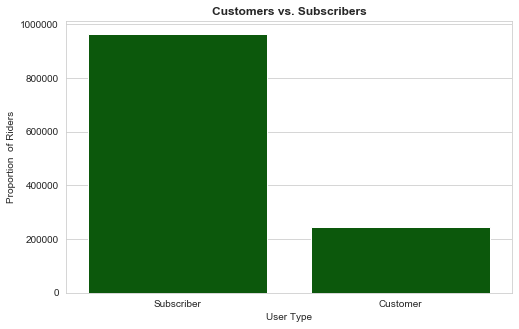

In [51]:
#Setting style
sb.set_style('whitegrid');
plt.figure(figsize = [8, 5])
#Plotting
sb.countplot(data = master, x = "user_type", order = master.user_type.value_counts().index, color = base_color);
#title, xlabel and ylabel
plt.xlabel('User Type');
plt.ylabel('Proportion  of Riders');
plt.title('Customers vs. Subscribers', fontweight='bold');

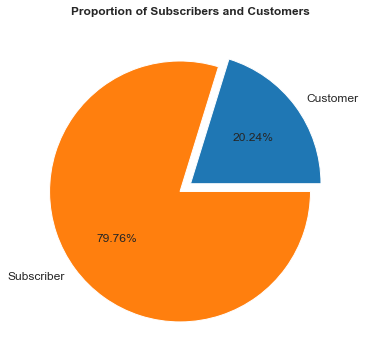

In [52]:
plt.figure(figsize = (6,6))
#Reading proportions
prop = [cust_no, sub_no];
labels =  [ 'Customer' , 'Subscriber']
#Plotting and title
plt.pie(prop, labels = labels, autopct='%1.2f%%',explode = (0,0.1), textprops={'fontsize': 12});
plt.title('Proportion of Subscribers and Customers', fontweight = 'bold');

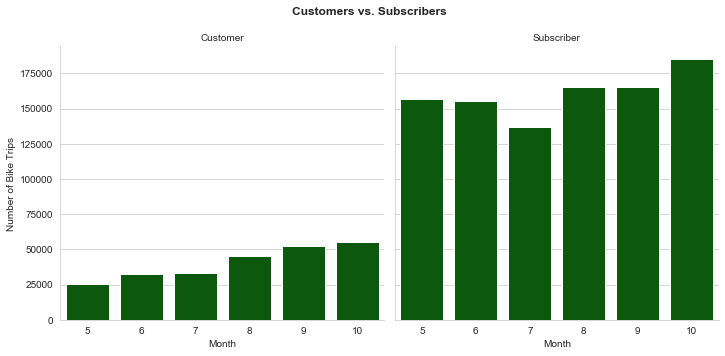

In [53]:
#Setting style
sb.set_style('whitegrid');
ax = sb.catplot(data=master, x='month', col="user_type", kind='count',color = base_color);
#plotting, title and suptitle
ax.set_axis_labels("Month", "Number of Bike Trips");
ax.fig.suptitle('Customers vs. Subscribers', fontweight='bold');
ax.set_titles("{col_name}");
plt.subplots_adjust(top=0.87)

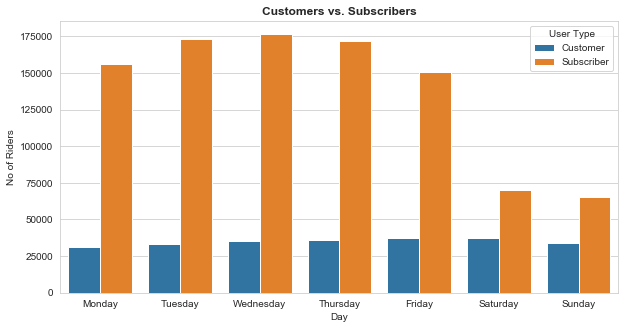

In [54]:
#Setting style
sb.set_style('whitegrid');
plt.figure(figsize = (10,5));
#list for order on xtick
order = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday', 'Sunday'];
#plotting
sb.countplot(data=master, x='dayname', hue="user_type",order = order);
#title, xlabel and ylabel and legend
plt.title('Customers vs. Subscribers', fontweight='bold');
plt.legend(title = 'User Type');
plt.xlabel('Day');
plt.ylabel('No of Riders');

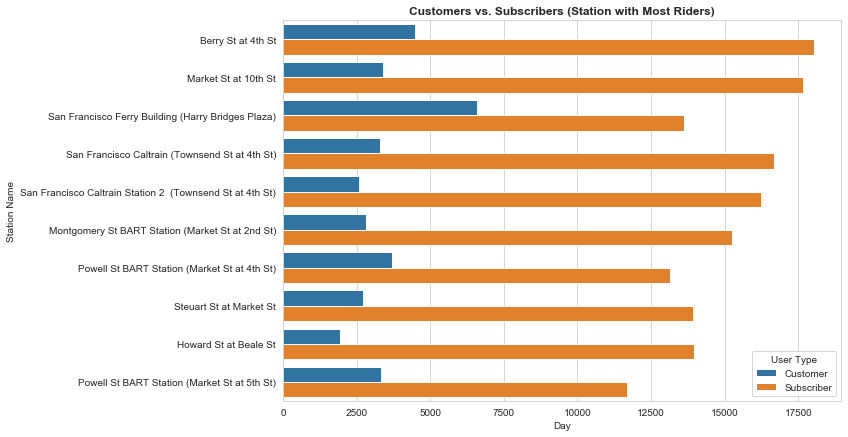

In [55]:
plt.figure(figsize = (10,7));
#plotting
sb.countplot(data=master, y='start_station_name', hue="user_type", order = master.start_station_name.value_counts()[:10].index);
#title, xlabel and ylabel and legend
plt.title('Customers vs. Subscribers (Station with Most Riders)', fontweight='bold');
plt.legend(title = 'User Type');
plt.xlabel('Day');
plt.ylabel('Station Name');

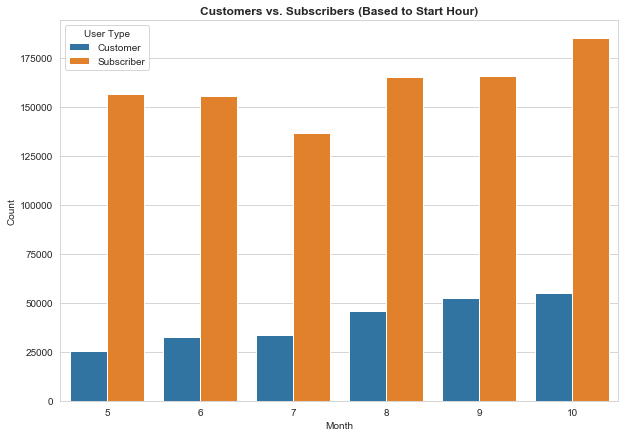

In [56]:
plt.figure(figsize = (10,7));
order = [5,6,7,8,9,10]
#plotting
sb.countplot(data=master, x='month', hue='user_type', order = order);
#title, xlabel and ylabel and legend
plt.title('Customers vs. Subscribers (Based to Start Hour)', fontweight='bold');
plt.legend(title = 'User Type');
plt.xlabel('Month');
plt.ylabel('Count');

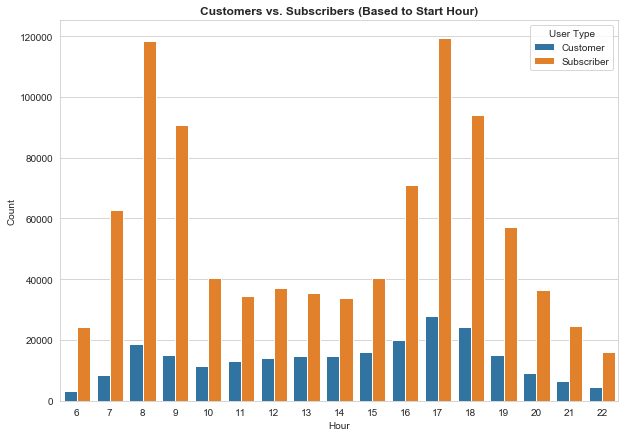

In [57]:
plt.figure(figsize = (10,7));
#setting order on xticks
order = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
sb.countplot(data=master, x='st_time_hr', hue='user_type', order = order);
#title, xlabel and ylabel and legend
plt.title('Customers vs. Subscribers (Based to Start Hour)', fontweight='bold');
plt.legend(title = 'User Type');
plt.xlabel('Hour');
plt.ylabel('Count');
plt.xlim(5.5,22.5);

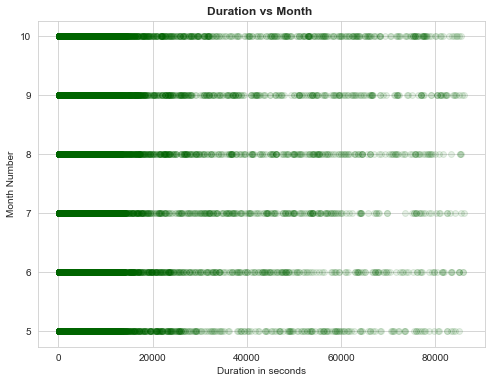

In [58]:
# scatter plot of duration vs month
plt.figure(figsize = [8, 6])
plt.scatter(data = master, x = 'duration_sec', y = 'month', alpha = 1/10, color = base_color)
#Title, Xlabel and Ylabel
plt.title('Duration vs Month ', fontweight = 'bold')
plt.xlabel('Duration in seconds')
plt.ylabel('Month Number')
plt.show()

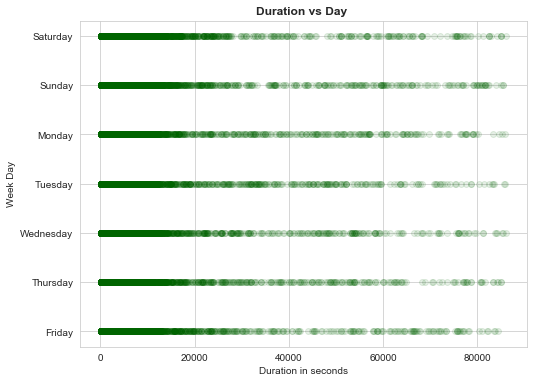

In [59]:
# scatter plot of 'Duration vs Day '

plt.figure(figsize = [8, 6])
plt.scatter(data = master, x = 'duration_sec', y = 'dayname', alpha = 1/10, color = base_color)
#Title, Xlabel and Ylabel
plt.title('Duration vs Day ', fontweight = 'bold')
plt.xlabel('Duration in seconds')
plt.ylabel('Week Day')
plt.show()

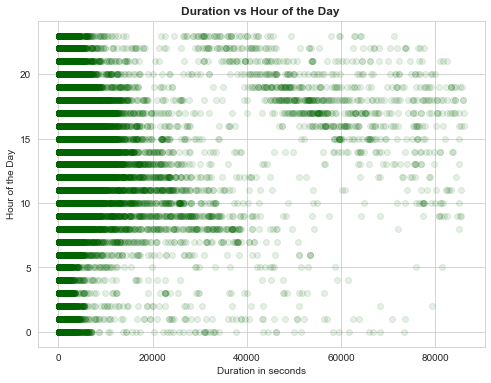

In [60]:
# scatter plot of Duration vs Hour of the Day

plt.figure(figsize = [8, 6])
plt.scatter(data = master, x = 'duration_sec', y = 'st_time_hr', alpha = 1/10, color = base_color)
#Title, Xlabel and Ylabel
plt.title('Duration vs Hour of the Day ', fontweight = 'bold')
plt.xlabel('Duration in seconds')
plt.ylabel('Hour of the Day')
plt.show()

### Observed relationships in bivariate exploration.

There is huge difference between the number of subscribers and customers. The analysis suggests that Subscribers are the daily commuters and use the bike ride for their daily travel whereas Customers use it mostly for leisure travel.

### Any interesting relationships between the other features
1. Number of rides taken by cutomers increases continuously from the Month of July till the month of October. Also, rides by customers are alomst equal all week whereas for subscribers it decreases drastically during weekends which suggests the above obsereved relationship
2. 79.76% of users are Subsribers
3. 92.77% users dont prefer sharing a bike

## Multivariate Exploration

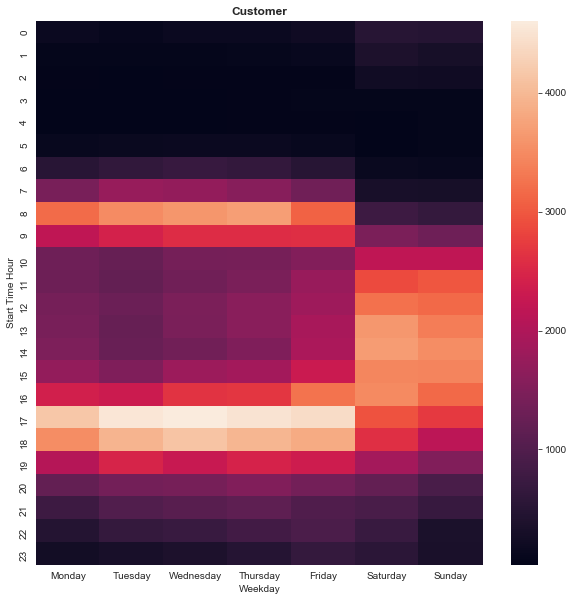

In [61]:
#Setting style
sb.set_style('whitegrid');
plt.figure(figsize=(10,10))
#setting list for weekday order
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
#Converting to categories
master['dayname'] = pd.Categorical(master['dayname'], categories= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True);
#grouping by start timehr and dayname
df_cust = master.query('user_type == "Customer"').groupby(['st_time_hr', 'dayname'])['bike_id'].size().reset_index();
df_cust = df_cust.pivot('st_time_hr', 'dayname', 'bike_id')
sb.heatmap(df_cust)
#title, xlabel and ylabel
plt.title('Customer',fontweight = 'bold')
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')
plt.show()

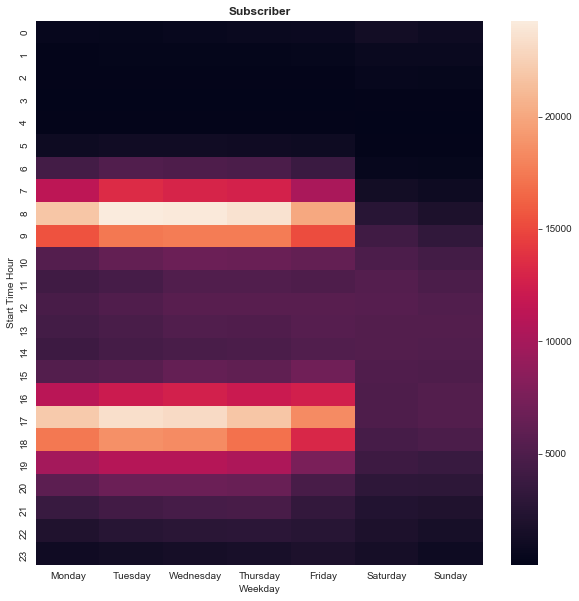

In [62]:
#Setting style
sb.set_style('whitegrid');
plt.figure(figsize=(10,10))
#setting list for weekday order
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
#Converting to categories
master['dayname'] = pd.Categorical(master['dayname'], categories= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True);
#grouping by start timehr and dayname
df_sub = master.query('user_type == "Subscriber"').groupby(['st_time_hr', 'dayname'])['bike_id'].size().reset_index();
df_sub = df_sub.pivot('st_time_hr', 'dayname', 'bike_id')
#Plotting heatmap
sb.heatmap(df_sub)
#title, xlabel and ylabel and legend
plt.title('Subscriber', fontweight = 'bold')
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')
plt.show()

In [63]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208719 entries, 0 to 239894
Data columns (total 13 columns):
 #   Column                   Non-Null Count    Dtype   
---  ------                   --------------    -----   
 0   duration_sec             1208719 non-null  int64   
 1   start_station_id         1208719 non-null  float64 
 2   start_station_name       1208719 non-null  object  
 3   end_station_id           1208719 non-null  float64 
 4   end_station_name         1208719 non-null  object  
 5   bike_id                  1208719 non-null  int64   
 6   user_type                1208719 non-null  category
 7   bike_share_for_all_trip  1208719 non-null  category
 8   month                    1208719 non-null  int64   
 9   weekday                  1208719 non-null  int64   
 10  st_time_hr               1208719 non-null  int64   
 11  e_time_hr                1208719 non-null  int64   
 12  dayname                  1208719 non-null  category
dtypes: category(3), float64(2), 

In [64]:
master.describe()

,duration_sec,start_station_id,end_station_id,bike_id,month,weekday,st_time_hr,e_time_hr
count,1.208719e+06,1.208719e+06,1.208719e+06,1.208719e+06,1.208719e+06,1.208719e+06,1.208719e+06,1.208719e+06
mean,8.300071e+02,1.467292e+02,1.424325e+02,4.582261e+03,7.673477e+00,2.598452e+00,1.354601e+01,1.371361e+01
std,1.940329e+03,1.232733e+02,1.222103e+02,4.205920e+03,1.728139e+00,1.829490e+00,4.834053e+00,4.860169e+00
min,6.100000e+01,3.000000e+00,3.000000e+00,1.200000e+01,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.730000e+02,4.700000e+01,4.100000e+01,1.383000e+03,6.000000e+00,1.000000e+00,9.000000e+00,9.000000e+00
50%,5.910000e+02,1.040000e+02,1.000000e+02,2.752000e+03,8.000000e+00,2.000000e+00,1.400000e+01,1.500000e+01
75%,9.130000e+02,2.420000e+02,2.380000e+02,9.716000e+03,9.000000e+00,4.000000e+00,1.700000e+01,1.800000e+01
max,8.621700e+04,4.820000e+02,4.820000e+02,1.311200e+04,1.000000e+01,6.000000e+00,2.300000e+01,2.300000e+01


In [65]:
master.columns

Index(['duration_sec', 'start_station_id', 'start_station_name',
       'end_station_id', 'end_station_name', 'bike_id', 'user_type',
       'bike_share_for_all_trip', 'month', 'weekday', 'st_time_hr',
       'e_time_hr', 'dayname'],
      dtype='object')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation of Subscriber using the bike ride for their daily routine only and not for leisure. Which can be easily spotted using the heatmap of the subscriber also the usage of bike rides for subscribers decreases on weekends confirming the previous analysis. For Customers, Bike rides for them are more sort of for leisure. Typical customers can be counted as travellers, etc for commute in locality.

### Were there any interesting or surprising interactions between features?
Looking back on the plots, it doesn't seem like there's a proper correlation effect between the three categorical features. However,they are also not fully independent of each other.Also, the number of trips increases during tourist seasons for commuters. Mean duration for bike ride is about **830** seconds

## Conclusion
1. 92.77% users dont like to share a bike ride
2. 79.76% are Subscribers whereas only 20.24% are customers
3. **Berry St at 4th St , Market St at 10th St, San Francisco Ferry Building, San Francisco Caltrain** are stations with most number of riders and **Brannan St at 7th**, **19th St at William St** have the least riders i.e. **2**
4. **San Francisco Ferry Building** has an usual high number of customers with comparison to subscribers
5. Majority of the rides happen betweeen the 7th - 9th hour and 15th - 19th hour
6. **Wednesday** is the day with most number of rides in a day with **211714** rides closely followed by **Thursday** and **Tuesday** with **208039** and **206285**
7. Weekends have the fall in number of riders especially **Sunday** with **99585**


### Limitations
This dataset being a huge one not all the data was being seen in one dataframe, also when I tried analysis for the whole year of 2019, even though all the files were being correctly read, I was not able to see or analyse all of data maybe because the combined file was too large. I could not find out what the issue was with that and was forced to work on limited months which also had too much entries as we can see in *master.info*, **1208719** entries are being read out of **239894**. This analysis is not 100% accurate since alot of parameters are missing such as age, gender which was not available in the dataset as well as the distance calculation from longitudes and latitudes


### References
1. Udacitys Knowledge Center and Peer Chat
2. https://stackoverflow.com/questions/47741400/pandas-dataframe-group-and-sort-by-weekday
3. https://datatofish.com/export-dataframe-to-csv/
4. https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f
5. https://seaborn.pydata.org/generated/seaborn.catplot.html

In [66]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'FordGoBIke_Communicate_Data_Findings.ipynb'])

0